### Relevante pakker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df = pd.read_csv("lego_data/Data/lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [136]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Ages',  'Unique_Pieces', 'Price', 'Pieces']]
# Pris som respons, forklaringsvariabel: antall brikker, unike brikker

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# # gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Ages'] = df2['Ages'].astype(str)
df2['Ages'] = df2['Ages'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)
df2['Ages'] = df2['Ages'].str.split('-').str[0]
df2['Ages'] = df2['Ages'].str.split('Ages').str[1]

df2['Ages'] = pd.to_numeric(df2['Ages'], errors='coerce')  # Convert to numeric
bins = [0, 6, 12, 100]
labels = ['0-6', '6-12', '12 +']

df2['Ages'] = pd.cut(df2['Ages'], bins=bins, labels=labels, right=False, ordered=True)
df2['Ages'] = df2['Ages'].astype(str)
df2 = df2.sort_values(by='Ages')

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

<>:23: SyntaxWarning: invalid escape sequence '\$'
<>:23: SyntaxWarning: invalid escape sequence '\$'
/var/folders/xs/125l58qx60scmztf38y2wlm00000gn/T/ipykernel_4651/2368270019.py:23: SyntaxWarning: invalid escape sequence '\$'
  df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)


,Ages,Unique_Pieces,Price,Pieces
700,0-6,26.0,29.99,37.0
245,0-6,112.0,29.99,192.0
244,0-6,78.0,19.99,125.0
243,0-6,64.0,9.99,82.0
242,0-6,10.0,24.99,26.0
...,...,...,...,...
445,6-12,74.0,49.99,404.0
446,6-12,203.0,49.99,604.0
447,6-12,177.0,39.99,373.0
416,6-12,92.0,19.99,198.0


### Mer eller mindre relevante kodesnutter

In [137]:
print(df2.mean(numeric_only = True))

Unique_Pieces    130.364583
Price             46.333561
Pieces           432.086174
dtype: float64


In [138]:
print(df2['Ages'].value_counts())

Ages
6-12    742
0-6     251
12 +     63
Name: count, dtype: int64


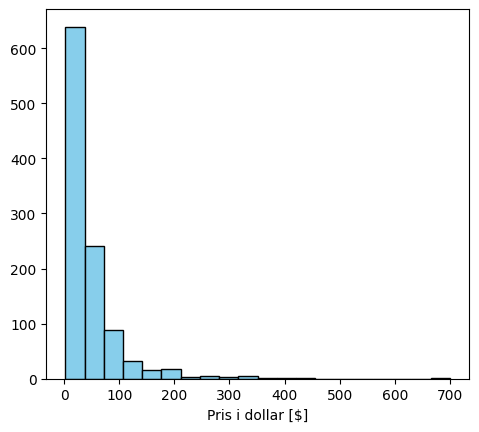

In [139]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

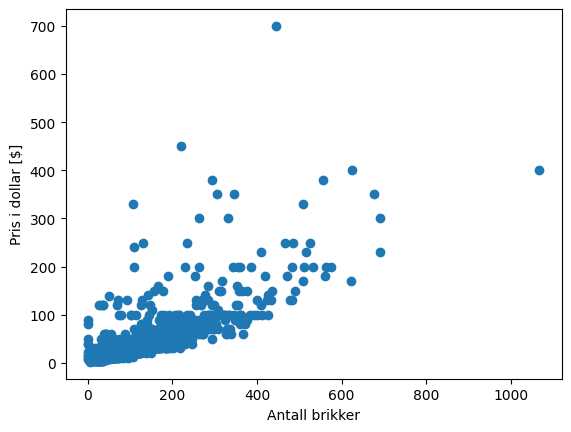

In [141]:
plt.scatter(df2['Unique_Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect('auto')
plt.show()

In [142]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Ages               12 +
Unique_Pieces     445.0
Price            699.99
Pieces           4784.0
Name: 825, dtype: object


In [143]:
# og hvilket har flest brikker?
print(df2.loc[df2['Unique_Pieces'].idxmax()])

Ages               12 +
Unique_Pieces    1067.0
Price            399.99
Pieces           5544.0
Name: 1267, dtype: object


In [144]:
#Hvilken aldersgruppe har de billigste settene i gjennomsnitt?
df2.groupby('Ages')['Price'].mean().sort_values(ascending=True)[:3]

Ages
0-6      27.302271
6-12     41.733154
12 +    176.339206
Name: Price, dtype: float64

In [145]:
# hvilken alder har flest brikker?
df2.groupby('Ages')['Pieces'].mean().sort_values(ascending=False)[:3]

Ages
12 +    2088.873016
6-12     388.347709
0-6      145.537849
Name: Pieces, dtype: float64

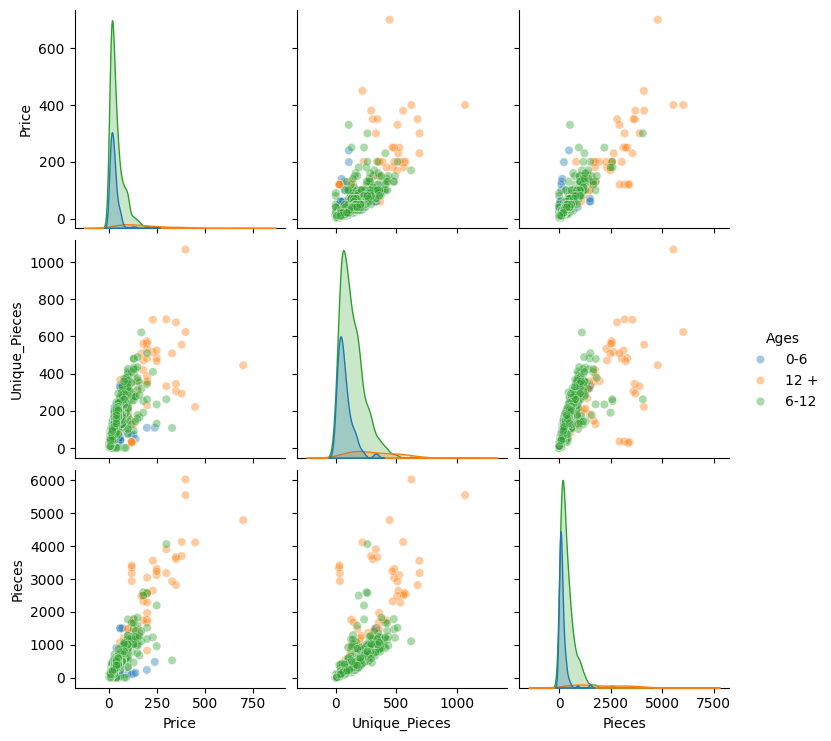

In [ ]:
sns.pairplot(df2, vars = ['Price', 'Unique_Pieces', 'Pieces'],
             hue = 'Ages', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [146]:
# enkel lineær regresjon
formel = 'Price ~ Unique_Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1325.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.67e-188
Time:                        16:01:25   Log-Likelihood:                -5361.9
No. Observations:                1056   AIC:                         1.073e+04
Df Residuals:                    1054   BIC:                         1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6503      1.821     -2.005      0.045      -7.223      -0.078
Unique_Pieces     0.3834      0.011     36.397      0.000       0.363       0.404
==============================================================================
Omnibus:                     1199.878   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120894.336
Skew:                           5.540   Prob(JB):                         0.00
Kurtosis:                      54.233   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

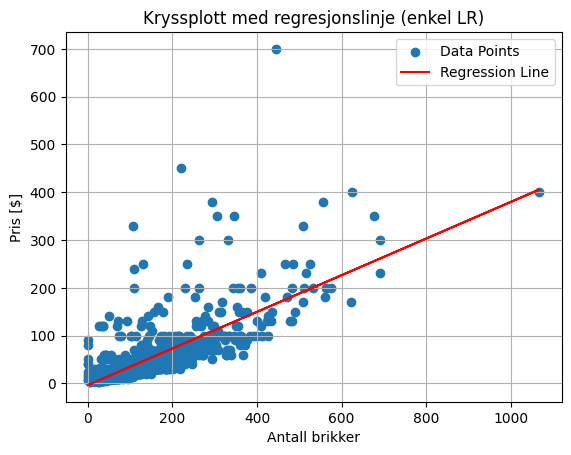

In [147]:
slope = resultat.params['Unique_Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Unique_Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Unique_Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

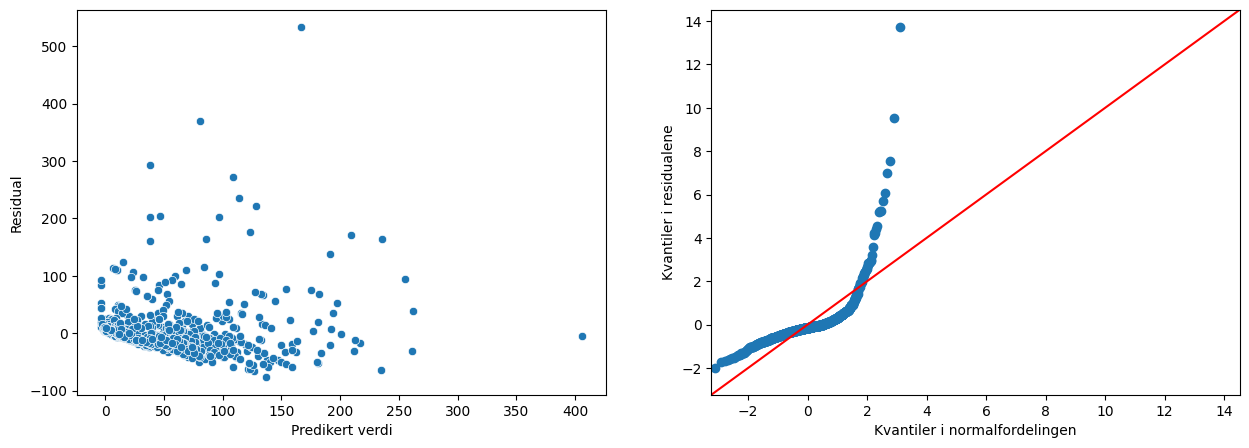

In [148]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

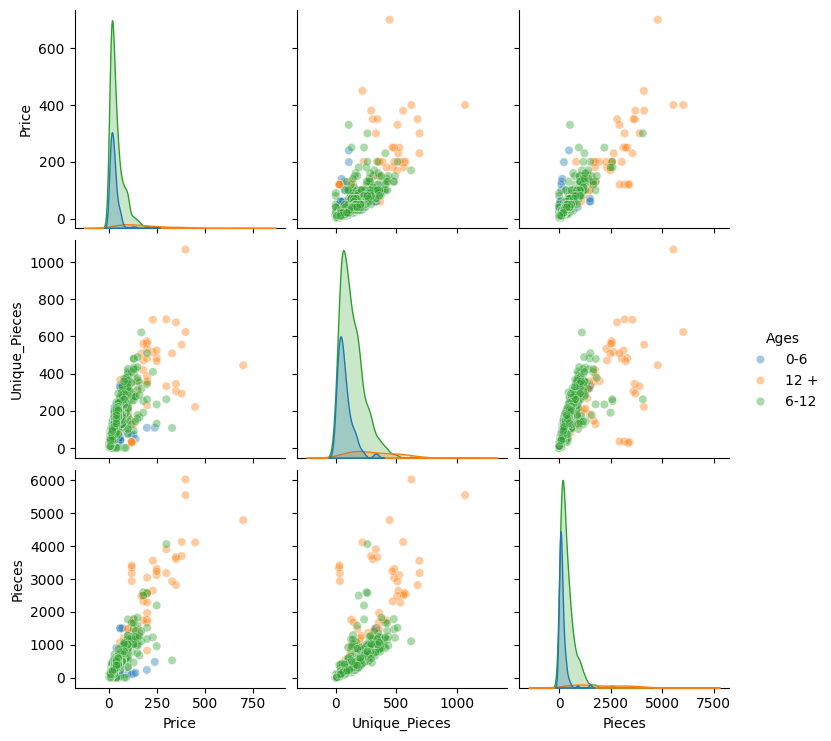

In [164]:
myAges = ['0-6', '6-12', '12 +']
subset_df = df2[df2['Ages'].isin(myAges)]
sns.pairplot(subset_df, vars = ['Price', 'Unique_Pieces', 'Pieces'],
             hue = 'Ages', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [151]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Unique_Pieces' , data = subset_df).fit()

In [152]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(myAges):
    modell3 = smf.ols('Price ~ Unique_Pieces' , data = subset_df[subset_df['Ages'].isin([theme])])
    resultater.append(modell3.fit())

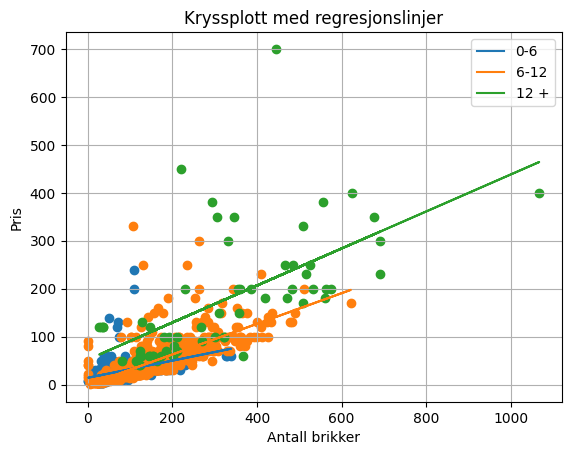

In [155]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(myAges):
    slope = resultater[i].params['Unique_Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Ages'].isin([theme])]['Unique_Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Ages'].isin([theme])]['Unique_Pieces'], subset_df[subset_df['Ages'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [156]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Unique_Pieces + Ages' , data = subset_df)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     601.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.62e-227
Time:                        16:03:12   Log-Likelihood:                -5264.4
No. Observations:                1056   AIC:                         1.054e+04
Df Residuals:                    1052   BIC:                         1.056e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7230      2.376      1.567      0.117      -0.939       8.385
Ages[T.12 +]     68.6159      5.690     12.058      0.000      57.450      79.782
Ages[T.6-12]     -5.2224      2.673     -1.954      0.051     -10.467       0.023
Unique_Pieces     0.3236      0.011     29.521      0.000       0.302       0.345
==============================================================================
Omnibus:                     1151.263   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110458.543
Skew:                           5.157   Prob(JB):                         0.00
Kurtosis:                      52.031   Cond. No.                         932.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols("Price ~ Pieces + C(Ages, Treatment('6-12'))" , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1354.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:46:29   Log-Likelihood:                -4956.7
No. Observations:                1056   AIC:                             9921.
Df Residuals:                    1052   BIC:                             9941.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              8.6312      1.185      7.285      0.000       6.306      10.956
C(Ages, Treatment('6-12'))[T.0-6]      6.2658      1.980      3.164      0.002       2.381      10.151
C(Ages, Treatment('6-12'))[T.12 +]   -10.3434      4.568     -2.264      0.024     -19.306      -1.381
Pieces                                 0.0852      0.002     48.920      0.000       0.082       0.089
==============================================================================
Omnibus:                      839.121   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59153.030
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      39.146   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

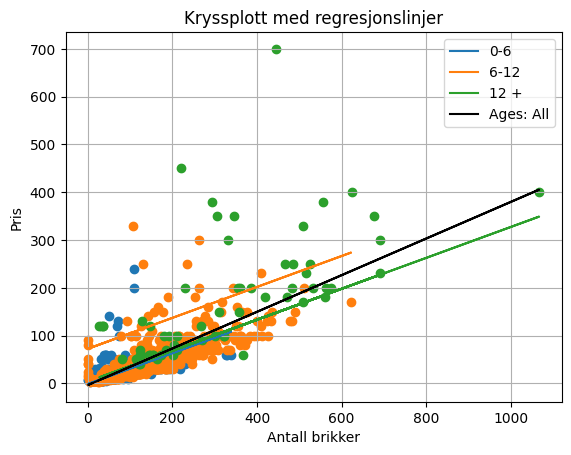

In [157]:
# plott
intercept = [modell3_mlr.fit().params['Ages[T.6-12]'], modell3_mlr.fit().params['Ages[T.12 +]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Unique_Pieces']

for i, theme in enumerate(myAges):

    regression_x = np.array(subset_df[subset_df['Ages'].isin([theme])]['Unique_Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Ages'].isin([theme])]['Unique_Pieces'], subset_df[subset_df['Ages'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Unique_Pieces'])
regression_y = res_sub.params['Unique_Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'Ages: All')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [158]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Unique_Pieces*Ages' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     372.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          7.64e-230
Time:                        16:03:41   Log-Likelihood:                -5252.6
No. Observations:                1056   AIC:                         1.052e+04
Df Residuals:                    1050   BIC:                         1.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     14.2588      3.474      4.105      0.000       7.443      21.075
Ages[T.12 +]                  38.0586      8.969      4.243      0.000      20.460      55.658
Ages[T.6-12]                 -15.1764      4.110     -3.693      0.000     -23.241      -7.112
Unique_Pieces                  0.1790      0.037      4.875      0.000       0.107       0.251
Unique_Pieces:Ages[T.12 +]     0.2069      0.043      4.848      0.000       0.123       0.291
Unique_Pieces:Ages[T.6-12]     0.1402      0.039      3.590      0.000       0.064       0.217
==============================================================================
Omnibus:                     1166.167   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113997.916
Skew:                           5.271   Prob(JB):                         0.00
Kurtosis:                      52.797   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

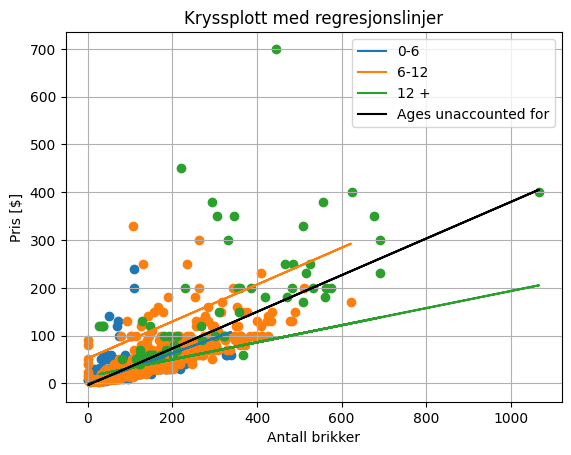

In [159]:
# plott
intercept = [modell3_mlri.fit().params['Ages[T.6-12]'], modell3_mlri.fit().params['Ages[T.12 +]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Unique_Pieces:Ages[T.6-12]'], modell3_mlri.fit().params['Unique_Pieces:Ages[T.12 +]'], 0] + modell3_mlri.fit().params['Unique_Pieces']

for i, theme in enumerate(myAges):

    regression_x = np.array(subset_df[subset_df['Ages'].isin([theme])]['Unique_Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Ages'].isin([theme])]['Unique_Pieces'], subset_df[subset_df['Ages'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Unique_Pieces'])
regression_y = res_sub.params['Unique_Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Ages unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [130]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

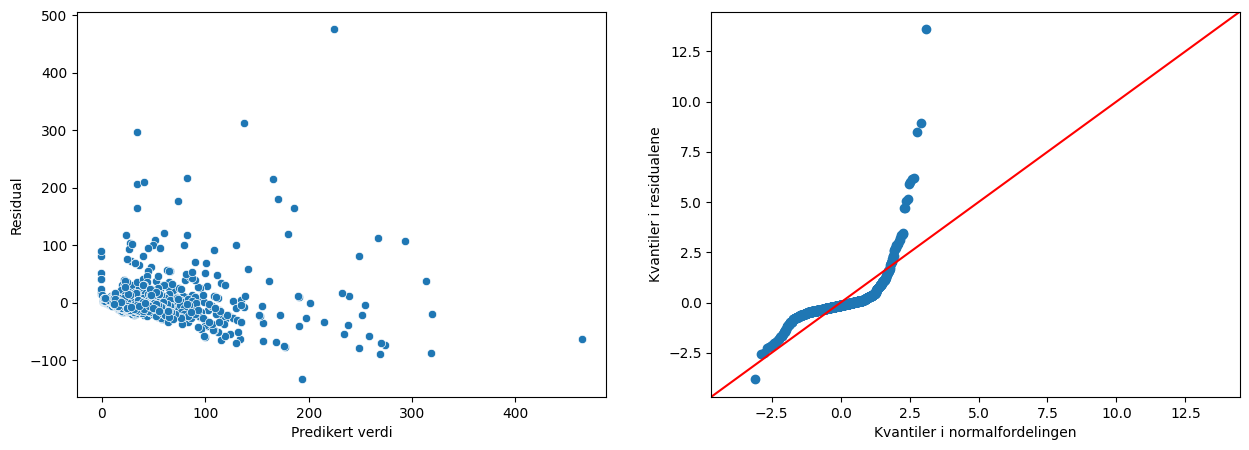

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [134]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

KeyError: 'Theme'

In [133]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

KeyError: 'Theme'